In [56]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y= True) # Ładowanie datasetow
from sklearn.neighbors import KNeighborsRegressor # model
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame

In [52]:
mod = KNeighborsRegressor().fit(X, y) # nauka modelu

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
#pipe.get_params() # wszystkie parametry

In [54]:
mod = GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1, 2,3 ,4 ,5, 6, 7, 8, 9, 10]},
             cv = 3) # cross validation -> podział datasetu

In [57]:
mod.fit(X, y)
DataFrame(mod.cv_results_) # pandas dataframe - dane cross validation

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000999,0.000003,0.001333,4.717095e-04,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.000666,0.000471,0.001332,4.702471e-04,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.001000,0.000005,0.001001,4.052337e-07,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.000666,0.000471,0.001359,4.526348e-04,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.000314,0.000444,0.001329,4.161563e-04,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.001020,0.000043,0.000981,3.697308e-05,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.000668,0.000472,0.001328,4.665379e-04,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.000669,0.000473,0.001334,4.711462e-04,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.000666,0.000471,0.001332,4.700779e-04,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.001002,0.000003,0.000998,2.614162e-06,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


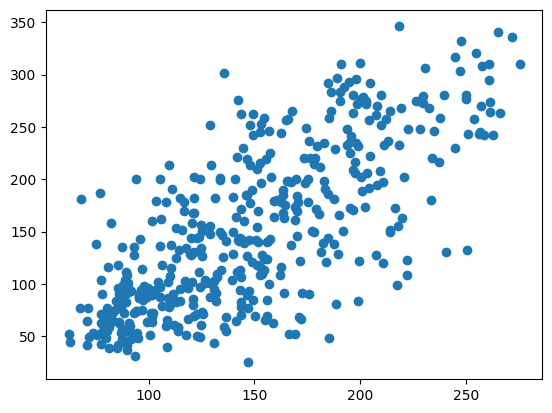

In [59]:
plt.scatter(mod.predict(X), y)